<table>
    <tr>
      <td>PYTHON PARA
HUMANIDADES DIGITALES - 
Introducción al análisis y
procesamiento de textos con Python
      </td>
      <td>Ediciones RC
      </td>
     </tr>
     <tr>
     <td>Rafael Caballero Roldán, Enrique Martín Martín y Adrián Riesco Rodríguez</td>
     </tr>
</table>

# Capítulo 3: Palabras y Elementos Básicos

## Índice
[Introducción](#intro)<br>
[Extracción de unidades léxicas con Spacy](#extraccion)<br>
[Típos de Símbolos](#tipos)<br>
[Palabras vacías](#vacias)<br>
[Nubes de palabras](#nubes)<br>
[Modelos preentrenados](#modelos)<br>
&nbsp;&nbsp;&nbsp;&nbsp;  [Instalación y carga de modelos](#instalacion)<br>
&nbsp;&nbsp;&nbsp;&nbsp;  [División de un texto en oraciones](#oraciones)<br>
[Lematización](#lematización)<br>
&nbsp;&nbsp;&nbsp;&nbsp;  [Extracción de lemas con spaCy](#lemas)<br>
&nbsp;&nbsp;&nbsp;&nbsp;  [Aplicación: contando palabras](#contando)<br>
&nbsp;&nbsp;&nbsp;&nbsp;  [Extracción de raíces](#raices)<br>



<a name="intro"></a>
### Introducción

Ejecutar el siguiente código para cargar los módulos requeridos para este capítulo

In [1]:
modules = ["spacy==3.4.1","wikipedia==1.4.0","wordcloud==1.8.2.2",
           "goose3==3.1.13","matplotlib==3.7.1"]


import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
  print("Instalando módulos")
  for m in modules:
      # para el import quitamos [...] y ==...
      p = m.find("[")
      mi = m if p==-1 else m[:p]
      p = mi.find("==")
      mi = mi if p==-1 else mi[:p]

      torch_loader = importlib.util.find_spec(mi)
      if torch_loader is not None:
          print(m," encontrado")
      else:
          print(m," No encontrado, instalando...",end="")  
          try:        
            r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
            print("¡hecho!")
          except:
            print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")
              
  print("¡Terminado!")

instala(modules)  

Instalando módulos
spacy==3.4.1  encontrado
wikipedia==1.4.0  encontrado
wordcloud==1.8.2.2  encontrado
goose3==3.1.13  encontrado
matplotlib==3.7.1  encontrado
¡Terminado!


In [2]:
# Ejemplo 3.1.1
s = "Desde lo alto se divisa la ciudad y toda la campiña"
l = s.split(" ")
l


['Desde',
 'lo',
 'alto',
 'se',
 'divisa',
 'la',
 'ciudad',
 'y',
 'toda',
 'la',
 'campiña']

In [3]:
s = "Se remueve, levanta una tenue polvareda, avanza"
l = s.split(" ")
l

['Se', 'remueve,', 'levanta', 'una', 'tenue', 'polvareda,', 'avanza']

<a name="extraccion"></a>
### Extracción de unidades léxicas con Spacy

In [4]:
# Ejemplo 3.2.1.
import spacy
nlp = spacy.blank('es')
s = "Se remueve, levanta una tenue polvareda, avanza"
doc =  nlp(s)
l = [token.text for token in doc]
l

['Se', 'remueve', ',', 'levanta', 'una', 'tenue', 'polvareda', ',', 'avanza']

In [5]:
l.count(",")

2

In [6]:
# Ejemplo 3.2.2
nlp = spacy.blank('es')
s = "@bertoldo: ¡estuvimos en el parque de atracciones!"
doc =  nlp(s)
unidades = [token.text for token in doc if not token.is_punct]
unidades


['@bertoldo', 'estuvimos', 'en', 'el', 'parque', 'de', 'atracciones']

<a name="tipos"></a>
### Típos de Símbolos

In [ ]:
# Ejemplo 3.3.1
import spacy
import wikipedia
wikipedia.set_lang("es") # en castellano 

# búscamos en la wikipedia
termino = "Número áureo"
pagina = wikipedia.page(termino)

# analizamos el texto extrayendo los números
nlp = spacy.blank('es') 
doc =  nlp(pagina.content) 
numeros =  [token.text for token in doc if token.like_num] 
print(numeros)

['1', '5', '2', '1.618', '033', '988', '749', '894', 'dos', '2,61803398874988', '1', '0,61803398874988', 'dos', 'dos', 'dos', 'Dos', '1', '5', '2', '1', '6180339887498948482045868343656381177203', '2000', 'primero', '300', 'dos', '1509', 'cinco', 'tres', '1525', '1835', '1830', '1900', '360', '1', '137', '5', '1.618033988749894848204586834365638117720309', '1.618033988749894848204586834365638117720309', '2', '1', '1', '1', '3', '1', '1', '2', '1', '2', '1', '2', '2', 'dos', '1', '1', '2', '2', '1', '2', '1', '1', '2', '1', '2', '2', '3', '4', '4', '1', '0', '2', '1', '3', '2', '4', '1', 'dos', '6', '3', '3', '4', '3', '5', '6', '0', '2', '2', '2', '2', '2', '4', '6', '8', '5', '1', '2', '5', '5', '1', '2', '1', '2', '2', '2', '5', '1', '2', '3', '5', '5', '1', '2', '3', '5', '5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '10', '1', '2', '18', '1', '1', '2', '10', '1', '2', '18', '1', '2', '5', '2', '36', '1', '2', '2', '5', '1', '2', '72', '2', '5', '1', '5', '72

In [ ]:
# Ejemplo 3.3.2.
# función proporciones
# recibe: un término que buscará en la wikipedia
# devuelve: la proporción de números en el texto
def proporciones(termino):
   pagina = wikipedia.page(termino)
   nlp = spacy.blank('es')
   doc =  nlp(pagina.content)
   numeros =  [token.text for token in doc if token.like_num]
   prop = 100*len(numeros)/len(doc)
   return round(prop,2)

print(proporciones("Número áureo") )
print(proporciones("Morfología lingüística") )
print(proporciones("Azorín") )


5.08
0.68
3.61


In [ ]:
# Ejemplo 3.3.3. Textos numéricos y no numéricos

# función texto_numérico
# recibe: un término a buscar en la wikipedia
# devuelve: la proporción de valores numéricos y un texto que
#  indica si se trata de un texto de caracter matemático o no
def texto_numérico(termino):
    prop = proporciones(termino) 
    if prop>4.0:
      tipo="numérico"
    else:
      tipo="no numérico"
    return prop,tipo  

términos = ["Platón", "Número primo", "Semántica", 
            "Algoritmo de Luhn"]
for ter in términos:
   proporción,tipo_texto = texto_numérico(ter)   
   print(f"{ter}. Tipo {tipo_texto} ({proporción})") 


Platón. Tipo no numérico (0.68)
Número primo. Tipo numérico (5.54)
Semántica. Tipo no numérico (2.01)
Algoritmo de Luhn. Tipo numérico (5.86)


<a name="vacias"></a>
### Palabras vacías

In [ ]:
import spacy
nlp = spacy.blank('es')
stopwords = nlp.Defaults.stop_words

print(len(stopwords))


522


In [ ]:
#Ejemplo 3.4.2. Eliminación de palabras vacías y signos de puntuación
import spacy
import spacy
nlp = spacy.blank('es')
s = "Platón murió a los 80 años de edad, dedicándose en sus últimos\
     años de vida a impartir enseñanzas en la Academia."

doc =  nlp(s)
l = [token.text for token in doc if not token.is_stop and
                                    not token.is_punct]
l


['Platón',
 'murió',
 '80',
 'años',
 'edad',
 'dedicándose',
 '    ',
 'años',
 'vida',
 'impartir',
 'enseñanzas',
 'Academia']

In [ ]:
nlp = spacy.blank("es")
nlp.Defaults.stop_words.add("platón")
nlp.Defaults.stop_words.add("academia")
doc =  nlp(s)
l = [token.text for token in doc if not token.is_stop and
     not token.is_punct]
l



['murió',
 '80',
 'años',
 'edad',
 'dedicándose',
 '    ',
 'años',
 'vida',
 'impartir',
 'enseñanzas']

In [ ]:
nlp = spacy.blank("es")
nlp.Defaults.stop_words.remove("últimos")
doc =  nlp(s)
l = [token.text for token in doc if not token.is_stop and
     not token.is_punct]
l


['murió',
 '80',
 'años',
 'edad',
 'dedicándose',
 'últimos',
 '    ',
 'años',
 'vida',
 'impartir',
 'enseñanzas']

In [ ]:
# Ejemplo 3.4.3. Utilizando nuestras propias palabras vacías
import spacy
nlp = spacy.blank('es')
s = "Platón murió a los 80 años de edad, dedicándose en sus últimos\
     años de vida a impartir enseñanzas en la Academia."
mispalabras = ["el", "la", "los", "las", "a", "en", "sus", "de"]

doc =  nlp(s)
l = [token.text for token in doc if
          not token.text.lower() in mispalabras and
          not token.is_punct]
l


['Platón',
 'murió',
 '80',
 'años',
 'edad',
 'dedicándose',
 'últimos',
 '    ',
 'años',
 'vida',
 'impartir',
 'enseñanzas',
 'Academia']

<a name="nubes"></a>
### Nubes de palabras

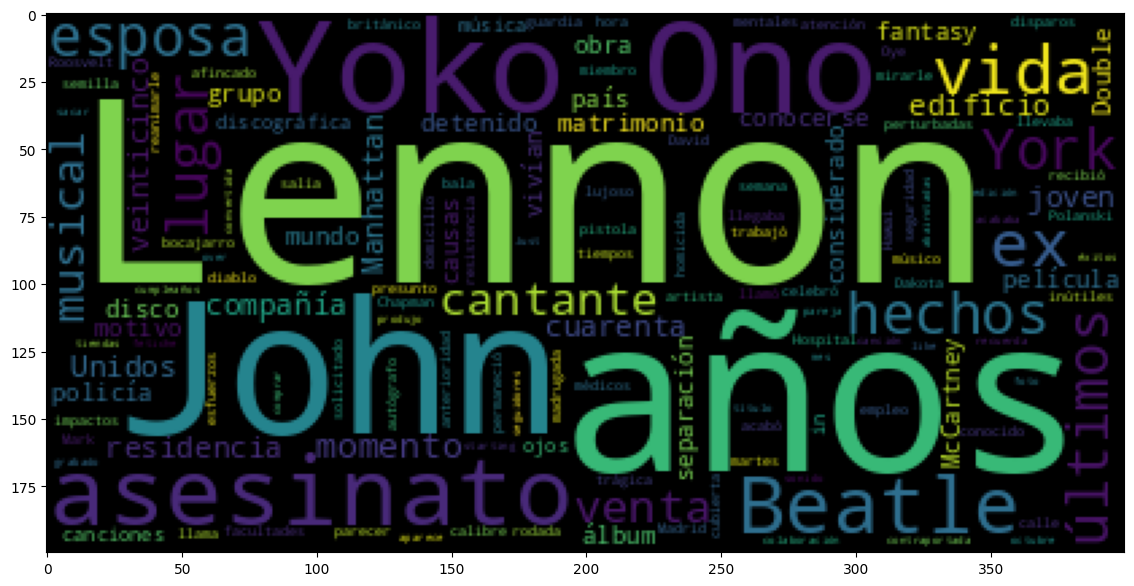

In [ ]:
# Ejemplo  3.5.1. Nube de palabras
from goose3 import Goose
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# descargamos la noticia
g = Goose()  
pag_dir = "https://elpais.com/diario/1980/12/10/cultura/"+\
          "345250806_850215.html"
articulo = g.extract(url=pag_dir) 
texto = articulo.cleaned_text 

# generar nube de palabras
nlp = spacy.blank('es')
palabrasvacías = nlp.Defaults.stop_words
w = WordCloud(stopwords = palabrasvacías) 
w.generate(texto)  

# mostramos el resultado
fig, ax = plt.subplots(1,1, figsize=(20,7),dpi=100) 
plt.imshow(w)
fig.savefig("wordcloud1.png")


<a name="modelos"></a>
### Modelos preentrenados 

<a name="instalacion"></a>
&nbsp;&nbsp;&nbsp;&nbsp;  Instalación y carga de los modelos

In [1]:
# esto tarda mucho y solo lo debemos ejecutar una ver
!python -m spacy download es_core_news_lg


2023-04-24 20:57:54.332415: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 20:57:58.236309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [2]:
# ejemplo 3.6.1
import spacy
nlp = spacy.load('es_core_news_lg')
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [3]:
import es_core_news_lg
nlp = es_core_news_lg.load()
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

<a name="oraciones"></a>
&nbsp;&nbsp;&nbsp;&nbsp;  División de un texto en oraciones

In [4]:
# Ejemplo 3.7.1
s = "he comprado patatas, naranjas, manzanas..."
punto = s.find(".") # posición del primer punto
if punto!=-1: # -1 si no hay puntos
  print("La primera oración: ", s[:punto])
  print("El resto del texto: ", s[punto+1:])

La primera oración:  he comprado patatas, naranjas, manzanas
El resto del texto:  ..


In [5]:
!python -m spacy download es_core_news_sm

2023-04-24 21:07:28.305331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 42.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
# Ejemplo 3.7.2. Separar en oraciones (II) spaCy
import es_core_news_sm
nlp = es_core_news_sm.load()
s = "he comprado patatas, naranjas, manzanas... todo en \
     http://verdurasfrescas.com. ¡Y ha llegado muy rápido!"
doc = nlp(s)
for i,o in enumerate(doc.sents):
    print(i+1,o)


In [7]:
# Ejemplo 3.7.3 Separar en oraciones (III) con spaCy
from goose3 import Goose
import es_core_news_sm
# descargamos la noticia
g = Goose()
pag_dir = "https://elpais.com/diario/1980/12/10/cultura/"+"345250806_850215.html"
articulo = g.extract(url=pag_dir)
texto = articulo.cleaned_text
# utilizamos el modelo para contar oraciones
nlp = es_core_news_sm.load()
doc = nlp(texto)
print("El artículo incluye ", len(list(doc.sents)), "oraciones")

El artículo incluye  31 oraciones


In [8]:
# Ejemplo 3.7.4 Comienzos de frase
import wikipedia
import es_core_news_sm
wikipedia.set_lang("es") # en castellano
# búscamos en la wikipedia
termino = "Marcelino Menéndez Pelayo"
pagina = wikipedia.page(termino)
# guardamos los comienzos de frase
nlp = es_core_news_sm.load()
doc = nlp(pagina.content)
comienzos = [token.text for token in doc
if token.is_sent_start and token.is_alpha ]
print(len(comienzos), comienzos)

126 ['Marcelino', 'Ejerció', 'Consagrado', 'Hermano', 'Fue', 'Posteriormente', 'Hizo', 'De', 'Al', 'En', 'Pronunció', 'En', 'En', 'Como', 'Su', 'Quiso', 'El', 'Menéndez', 'sus', 'Entre', 'Aunque', 'Sus', 'Horacio', 'Es', 'En', 'Historia', 'Menéndez', 'Uno', 'El', 'Simultáneamente', 'Corrigió', 'El', 'Existe', 'Laverde', 'Pero', 'La', 'Su', 'El', 'Los', 'Por', 'La', 'La', 'De', 'Fue', 'Estudios', 'Telesforo', 'Polémicas', 'La', 'Horacio', 'Estudios', 'Odas', 'Traductores', 'Traductores', 'Historia', 'Dramas', 'Obras', 'Historia', 'Estudios', 'Obras', 'Antología', 'Ensayos', 'Antología', 'Historia', 'Bibliografía', 'El', 'Semblanza', 'Obras', 'Literatura', 'Realismo', 'Literatura', 'Filología', 'Don', 'Madrid', 'ISBN', 'Consultado', 'Garrido', 'Nueva', 'ISSN', 'Consultado', 'González', 'Ayer', 'ISSN', 'Madariaga', 'Siglo', 'La', 'Consultado', 'Reglá', 'Ribas', 'Menéndez', 'Cien', 'ISBN', 'Rodríguez', 'Aviso', 'Liburna', 'ISSN', 'Sainz', 'Estudios', 'Madrid', 'ISBN', 'Saz', 'Ayer', 'ISSN'

In [9]:
# Ejemplo 3.7.5
import spacy
import wikipedia
wikipedia.set_lang("es") # en castellano

término = "Literatura victoriana"
pagina = wikipedia.page(término)
nlp = spacy.blank("es")
nlp.add_pipe('sentencizer')
doc =  nlp(pagina.content)
print(len(list(doc.sents)))

1185


<a name="lematización"></a>
### Lematización

<a name="lemas"></a>
&nbsp;&nbsp;&nbsp;&nbsp;  Extracción de lemas con spaCy

In [19]:
!python -m spacy download es_core_news_md

2023-04-24 21:52:36.588935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 11.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [20]:
#Ejemplo 3.8.1. Lematización
import spacy
s = "Las obras se tienen medio terminadas cuando se han \
     comenzado bien"
nlp = spacy.load("es_core_news_md")
doc = nlp(s)
lemas = [token.lemma_ for token in doc if  token.is_alpha]
print(" ".join(lemas))


el obra él tener medio terminado cuando él haber comenzar bien


<a name="contando"></a>
&nbsp;&nbsp;&nbsp;&nbsp;   Aplicación: contando palabras

In [10]:
# Ejemplo 3.8.2
from collections import Counter
c1 = Counter("abracadabra")
print(c1)

Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})


In [12]:
# Ejemplo 3.8.3
from collections import Counter
s = "No rechaces los sueños por ser sueños" +\
    "Todos los sueños pueden ser realidad si el sueño no se acaba"
palabras = s.split(" ")
c2 = Counter(palabras)
print(c2)

Counter({'los': 2, 'sueños': 2, 'ser': 2, 'No': 1, 'rechaces': 1, 'por': 1, 'sueñosTodos': 1, 'pueden': 1, 'realidad': 1, 'si': 1, 'el': 1, 'sueño': 1, 'no': 1, 'se': 1, 'acaba': 1})


In [13]:
c2.most_common(3)

[('los', 2), ('sueños', 2), ('ser', 2)]

In [21]:
# Ejemplo 3.8.4. Contando palabras
from goose3 import Goose
from collections import Counter
import es_core_news_md

# descargamos el texto
g = Goose()
url="https://www.gutenberg.org/cache/epub/8870/pg8870.html"
articulo = g.extract(url=url)
print(articulo.title)
texto = articulo.cleaned_text   

# contamos palabras más frecuentes
nlp = es_core_news_md.load()  
doc = nlp(texto)               
palabras = [p.text.upper() for p in doc        
             if p.is_alpha and not p.is_stop]  
frecuencia = Counter(palabras)  
palabras_comunes = frecuencia.most_common(5) 
print(palabras_comunes)


La Mejor Cocinera, Recetas de Cocina
[('SAL', 332), ('AGUA', 330), ('PONE', 321), ('MANTECA', 274), ('AZÚCAR', 228)]


In [22]:
palabras = [p.lemma_.upper() for p in doc
            if p.is_alpha and not p.is_stop]

frecuencia = Counter(palabras)  
palabras_comunes = frecuencia.most_common(5) 
print(palabras_comunes)


[('PONER', 517), ('AGUA', 336), ('SAL', 332), ('HUEVO', 330), ('COCER', 306)]


<a name="raices"></a>
&nbsp;&nbsp;&nbsp;&nbsp; Extracción de raíces

In [23]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
palabras = [stemmer.stem(p.text).upper() for p in doc
              if p.is_alpha and not p.is_stop]
frecuencia = Counter(palabras)
palabras_comunes = frecuencia.most_common(5)

palabras_comunes

[('PON', 556), ('HUEV', 361), ('SAL', 339), ('AGU', 337), ('COC', 327)]

In [27]:
from nltk.stem import SnowballStemmer
import es_core_news_md
nlp = es_core_news_md.load()  
doc = nlp(texto) 

stemmer = SnowballStemmer('spanish')

palabras = [p.text.upper() for p in doc        
             if p.is_alpha and not p.is_stop]  
print("Palabras no vacías en el texto ", len(set(palabras)))   

palabras = [p.lemma_.upper() for p in doc
            if p.is_alpha and not p.is_stop]
print("Con lemas ", len(set(palabras)))   
palabras = [stemmer.stem(p.text).upper() for p in doc
              if p.is_alpha and not p.is_stop]
print("Con raíces ", len(set(palabras)))   


Palabras no vacías en el texto  3231
Con lemas  2594
Con raíces  1895
